# **Noisy evaluation data removal (25/08)**

In [138]:
import os
import sys
import pandas as pd

curr_dir = os.getcwd()
lib_dir = os.path.join(curr_dir, '..', '..', 'notebooks')
if lib_dir not in sys.path:
    sys.path.insert(0,lib_dir)

from utils import plots, constants

## **Constants**

In [139]:
TUNING_FOLDER = constants.TUNING_FOLDER
TUNING_RAW_FOLDER = os.path.join(TUNING_FOLDER, 'raw')
TUNING_CLEANED_FOLDER = os.path.join(TUNING_FOLDER, 'cleaned')

LVL3_S2S_GN_ES_RESULTS = os.path.join(TUNING_RAW_FOLDER, 'lvl3_s2s_gn_es.csv')
LVL3_S2S_ES_GN_RESULTS = os.path.join(TUNING_RAW_FOLDER, 'lvl3_s2s_es_gn.csv')
LVL3_TRANSFORMER_GN_ES_RESULTS = os.path.join(TUNING_RAW_FOLDER, 'lvl3_transformer_gn_es.csv')
LVL3_TRANSFORMER_ES_GN_RESULTS = os.path.join(TUNING_RAW_FOLDER, 'lvl3_transformer_es_gn.csv')

LVL3_S2S_GN_ES_CLEANED = os.path.join(TUNING_CLEANED_FOLDER, 'lvl3_s2s_gn_es.csv')
LVL3_S2S_ES_GN_CLEANED = os.path.join(TUNING_CLEANED_FOLDER, 'lvl3_s2s_es_gn.csv')
LVL3_TRANSFORMER_GN_ES_CLEANED = os.path.join(TUNING_CLEANED_FOLDER, 'lvl3_transformer_gn_es.csv')
LVL3_TRANSFORMER_ES_GN_CLEANED = os.path.join(TUNING_CLEANED_FOLDER, 'lvl3_transformer_es_gn.csv')


## **Noise Analysis**

### **Level 1**

### **Level 2**

### **Level 3**

In [140]:
def get_constant_score_models(df: pd.DataFrame, all_constant=False):
    n_constant_limit = 2
    nunique_score_df = df.groupby(['model_name', 'score_type'])[['score']].nunique()
    if not all_constant:
        n_constant_limit = df.groupby(['model_name', 'score_type'])['epoch'].nunique()
    to_delete_models_unique = nunique_score_df[nunique_score_df['score'] < n_constant_limit].reset_index()['model_name'].unique().tolist()
    to_delete_models_df = df[df['model_name'].isin(to_delete_models_unique)]
    return to_delete_models_df['model_name'].tolist()

def get_started_late_models(df: pd.DataFrame):
    df = df.copy()
    df['epoch'] = df['epoch'].astype(int)
    minimum_epoch_model_df = df.groupby(['model_name'])['epoch'].min().reset_index()
    minimum_epoch_model_df = minimum_epoch_model_df[minimum_epoch_model_df['epoch'] > 10]
    return minimum_epoch_model_df['model_name'].tolist()

def get_short_period_models(df: pd.DataFrame, max_len=7):
    df = df.copy()
    row_count_model_df = df.groupby(['model_name', 'score_type']).count().reset_index()
    row_count_model_df = row_count_model_df[row_count_model_df['epoch'] < max_len]
    return row_count_model_df['model_name'].tolist()

def remove_models(df: pd.DataFrame, to_delete_models: list):
    to_delete_models_series = df['model_name'].isin(to_delete_models)
    kept_models_df = df[~to_delete_models_series]
    not_kept_models_df = df[to_delete_models_series]
    return kept_models_df, not_kept_models_df

#### **S2S [GN -> ES]**

In [141]:
gn_es_lvl3_results = pd.read_csv(LVL3_S2S_GN_ES_RESULTS)

In [142]:
to_delete_models = get_constant_score_models(gn_es_lvl3_results) + \
                    get_started_late_models(gn_es_lvl3_results) + \
                    get_short_period_models(gn_es_lvl3_results)

kept_models_df, not_kept_models_df = remove_models(gn_es_lvl3_results, to_delete_models)

f:\my_year2023\PLN\code\MARIAN\scripts\migrations\..\..\notebooks\utils\plots.py:42: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


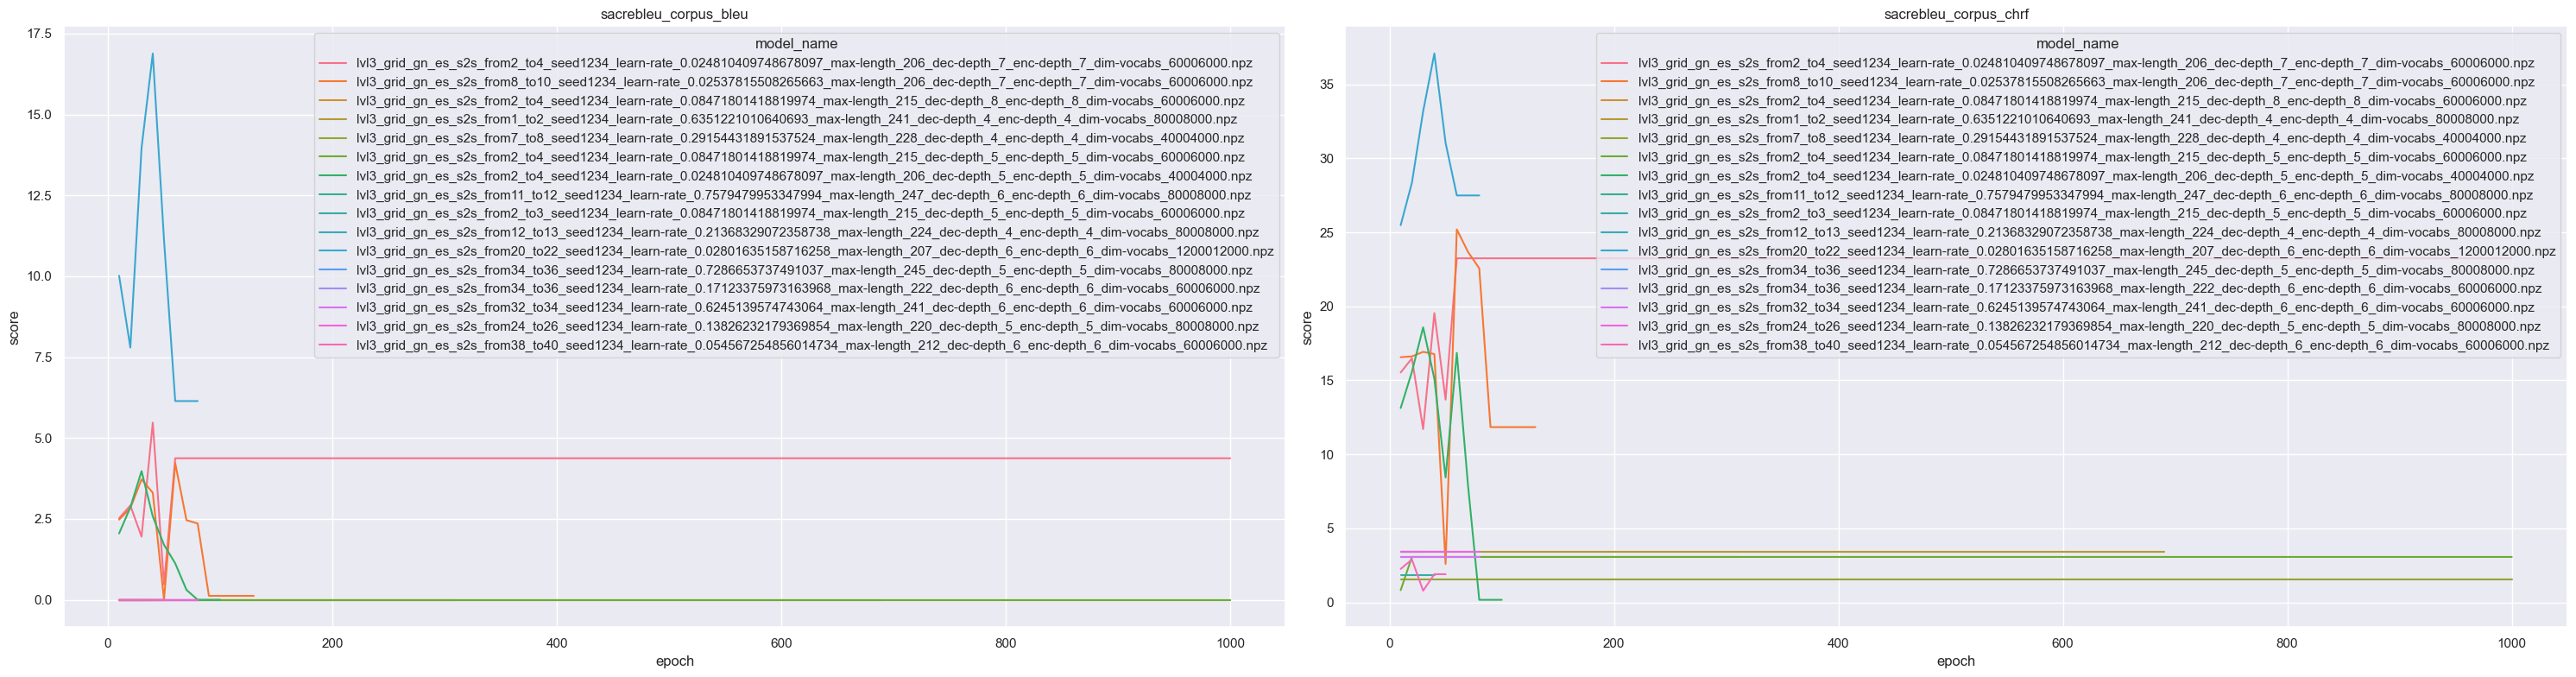

In [143]:
plots.plot_metric_by_epoch_foreach_model(not_kept_models_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(30,8));

f:\my_year2023\PLN\code\MARIAN\scripts\migrations\..\..\notebooks\utils\plots.py:42: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


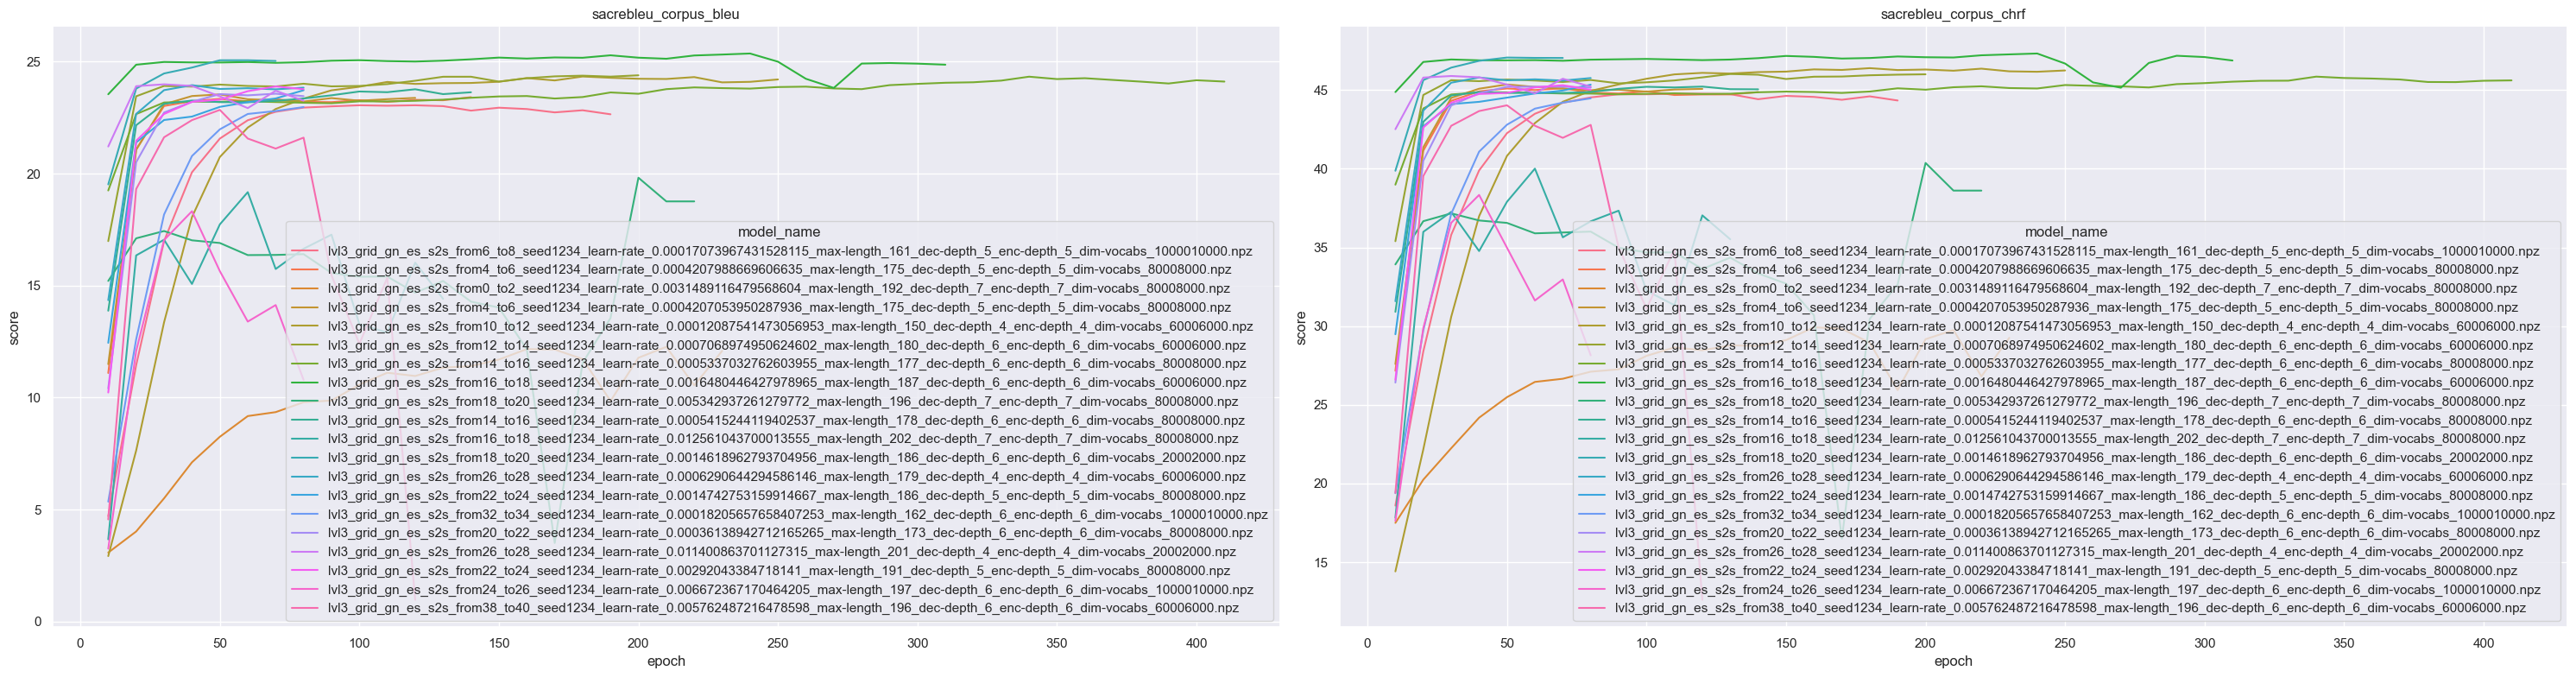

In [144]:
plots.plot_metric_by_epoch_foreach_model(kept_models_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(30,8));

In [145]:
len(kept_models_df['model_name'].unique())

20

In [146]:
kept_models_df.to_csv(LVL3_S2S_GN_ES_CLEANED, index=False)

##### **S2S [ES -> GN]**

In [147]:
es_gn_lvl3_s2s_results_df = pd.read_csv(LVL3_S2S_ES_GN_RESULTS)

In [148]:
to_delete_models_s2s_es_gn = get_constant_score_models(es_gn_lvl3_s2s_results_df) + \
                             get_started_late_models(es_gn_lvl3_s2s_results_df) + \
                             get_short_period_models(es_gn_lvl3_s2s_results_df)

kept_es_gn_models_df, not_kept_es_gn_models_df = remove_models(es_gn_lvl3_s2s_results_df, to_delete_models_s2s_es_gn)

f:\my_year2023\PLN\code\MARIAN\scripts\migrations\..\..\notebooks\utils\plots.py:42: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


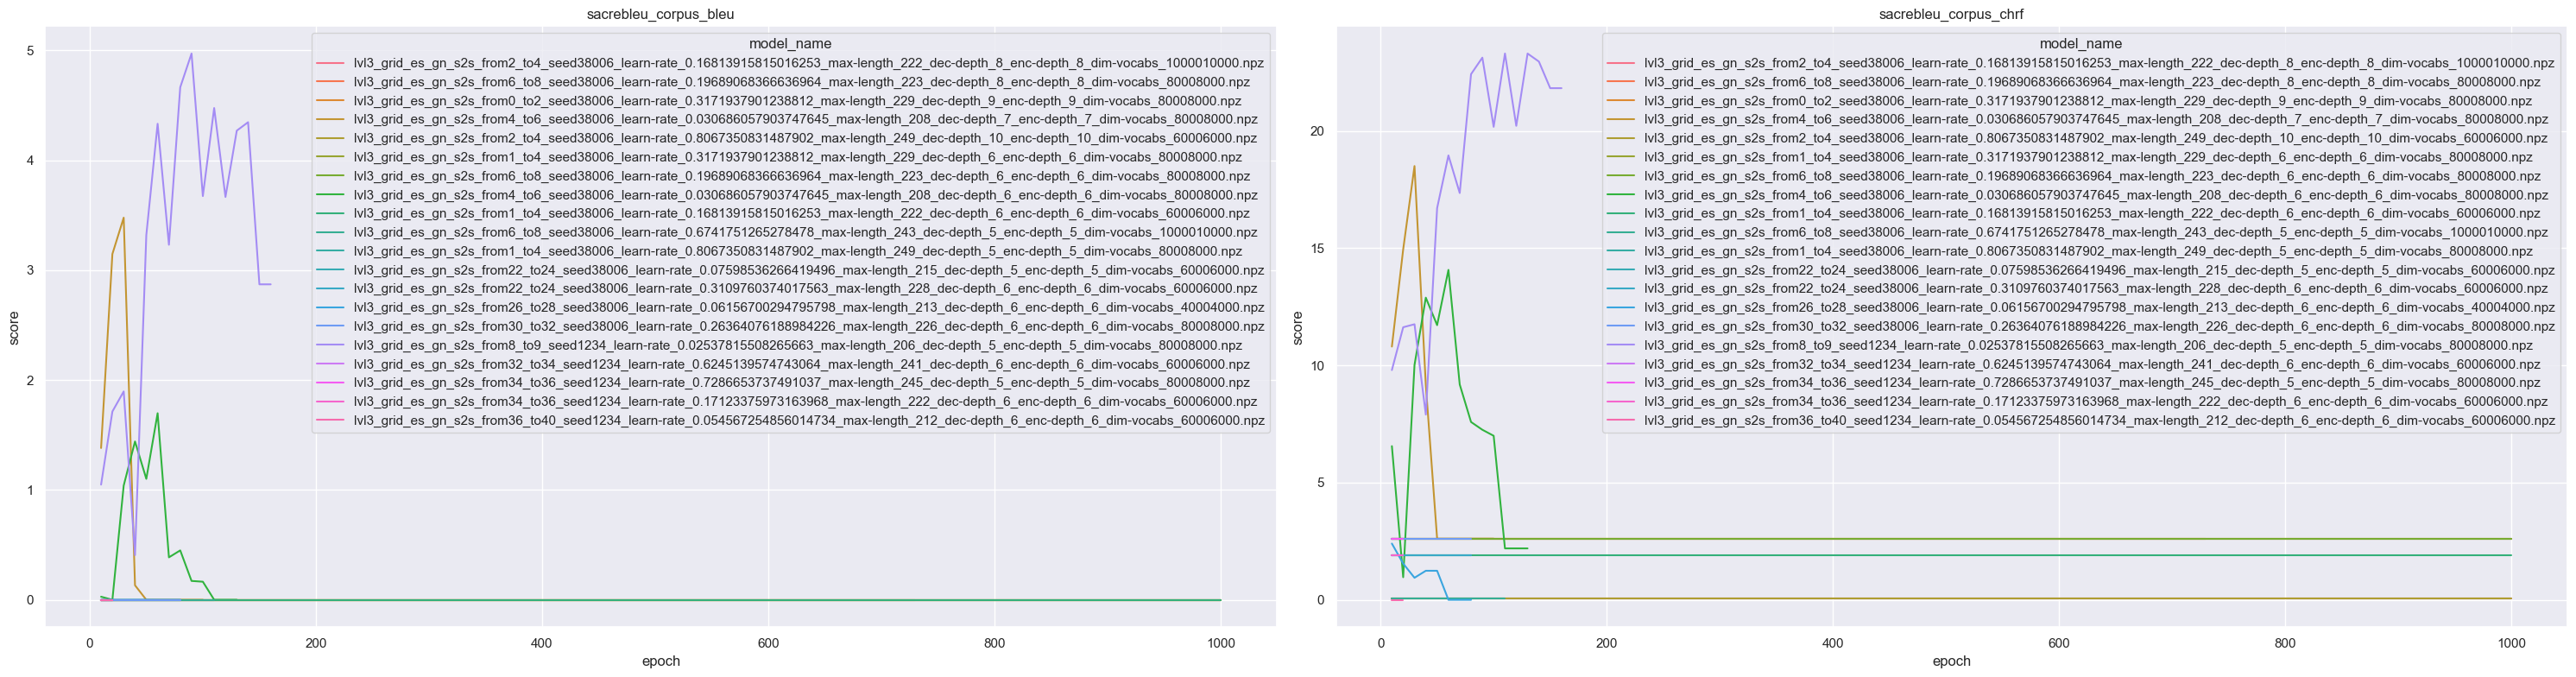

In [149]:
plots.plot_metric_by_epoch_foreach_model(not_kept_es_gn_models_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(30,8));

f:\my_year2023\PLN\code\MARIAN\scripts\migrations\..\..\notebooks\utils\plots.py:42: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


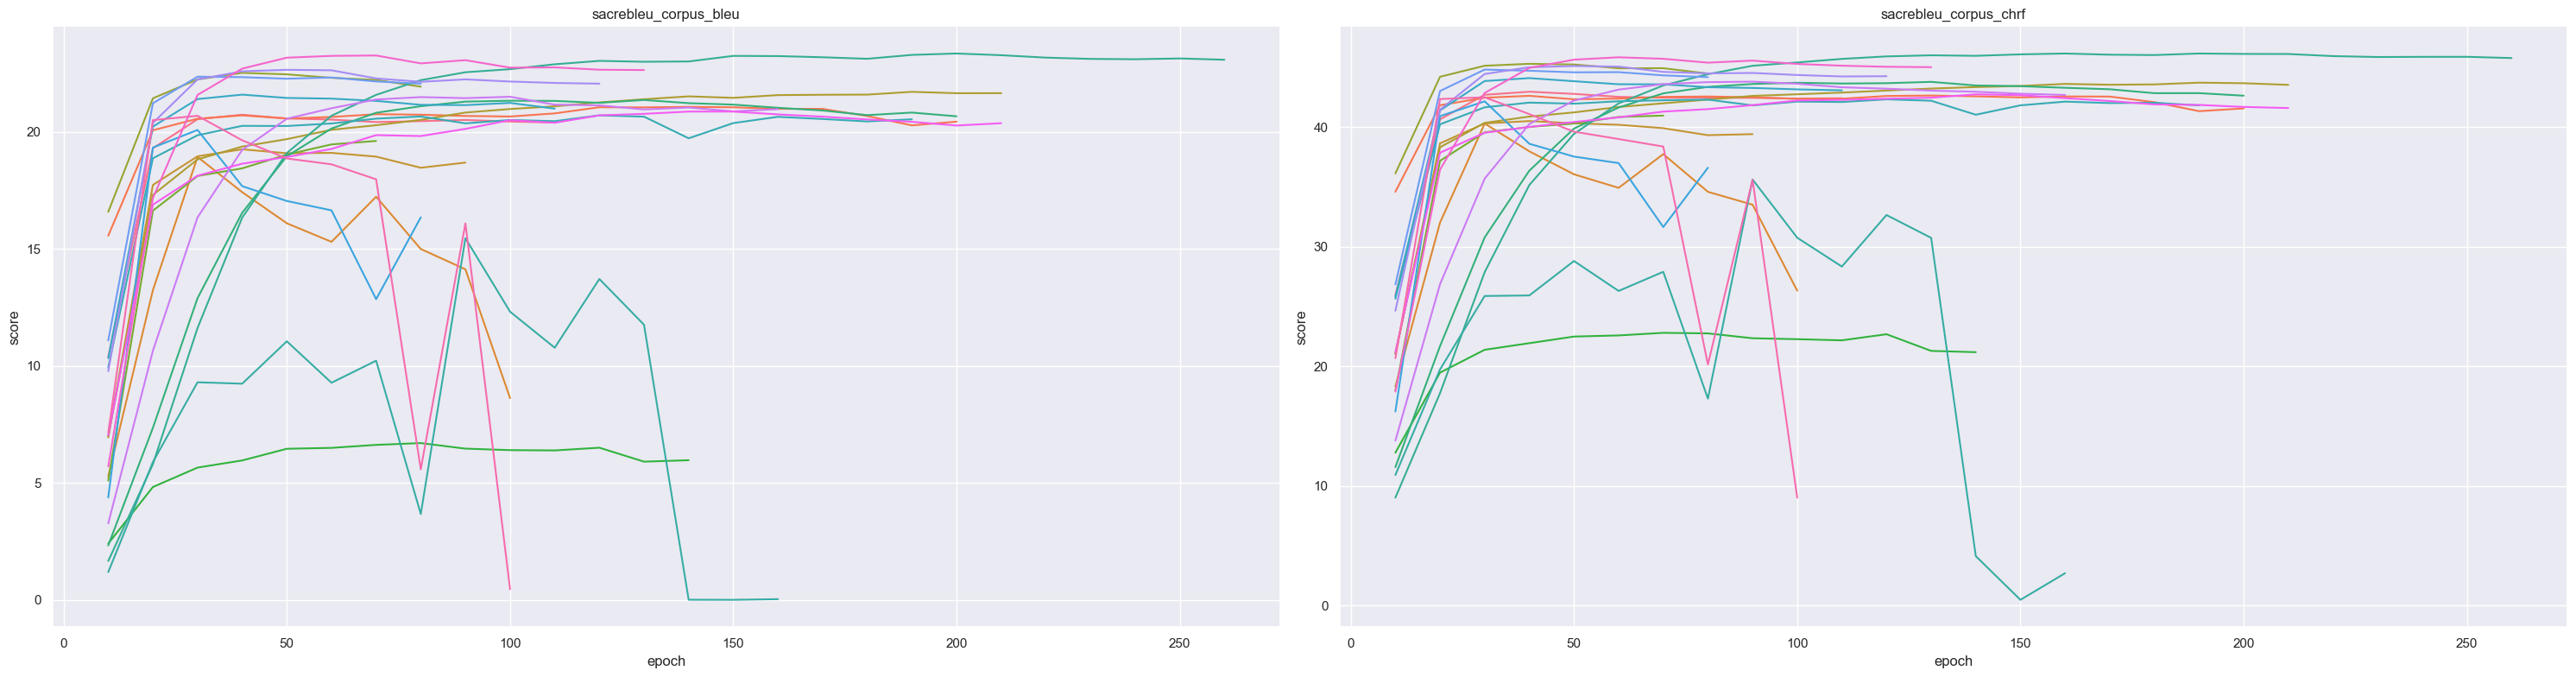

In [150]:
plots.plot_metric_by_epoch_foreach_model(kept_es_gn_models_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(30,8), legend=False);

In [151]:
len(kept_es_gn_models_df['model_name'].unique())

20

In [152]:
kept_es_gn_models_df.to_csv(LVL3_S2S_ES_GN_CLEANED, index=False)

#### **Transformer [ES->GN]**

In [153]:
lvl3_transformer_es_gn_df = pd.read_csv(LVL3_TRANSFORMER_ES_GN_RESULTS)

In [154]:
to_delete_models_transformer_es_gn = get_constant_score_models(lvl3_transformer_es_gn_df) + \
                             get_started_late_models(lvl3_transformer_es_gn_df) + \
                             get_short_period_models(lvl3_transformer_es_gn_df)

kept_es_gn_transformer_models_df, not_kept_es_gn_transformer_models_df = remove_models(lvl3_transformer_es_gn_df, to_delete_models_transformer_es_gn)

In [155]:
len(not_kept_es_gn_transformer_models_df.index), len(kept_es_gn_transformer_models_df['model_name'].unique())

(0, 20)

f:\my_year2023\PLN\code\MARIAN\scripts\migrations\..\..\notebooks\utils\plots.py:42: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


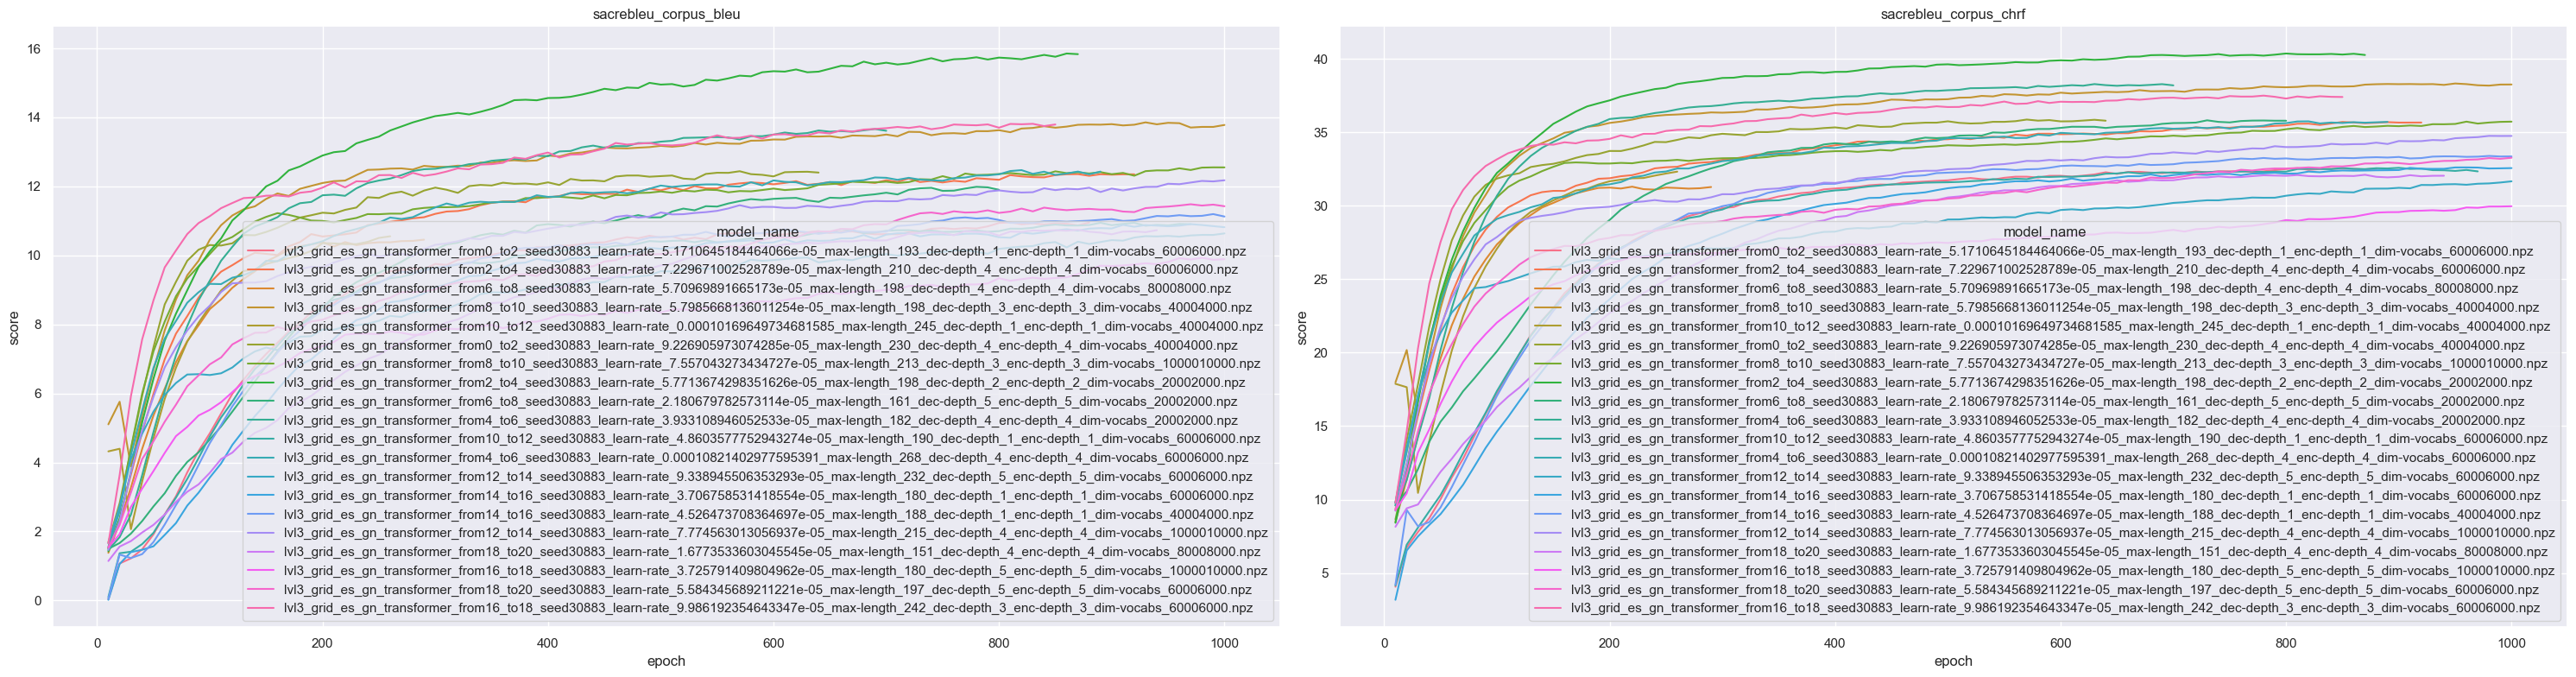

In [156]:
plots.plot_metric_by_epoch_foreach_model(kept_es_gn_transformer_models_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(30,8), legend=True);

In [157]:
kept_es_gn_transformer_models_df.to_csv(LVL3_TRANSFORMER_ES_GN_CLEANED, index=False)

##### **Transformer [GN->ES]**

In [158]:
lvl3_transformer_gn_es_df = pd.read_csv(LVL3_TRANSFORMER_GN_ES_RESULTS)

In [159]:
to_delete_models_transformer_gn_es = get_constant_score_models(lvl3_transformer_gn_es_df) + \
                                    get_started_late_models(lvl3_transformer_gn_es_df) + \
                                    get_short_period_models(lvl3_transformer_gn_es_df)

kept_gn_es_transformer_models_df, not_kept_gn_es_transformer_models_df = remove_models(lvl3_transformer_gn_es_df, to_delete_models_transformer_gn_es)

In [160]:
len(not_kept_gn_es_transformer_models_df.index), len(kept_gn_es_transformer_models_df['model_name'].unique())

(8320, 52)

f:\my_year2023\PLN\code\MARIAN\scripts\migrations\..\..\notebooks\utils\plots.py:42: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


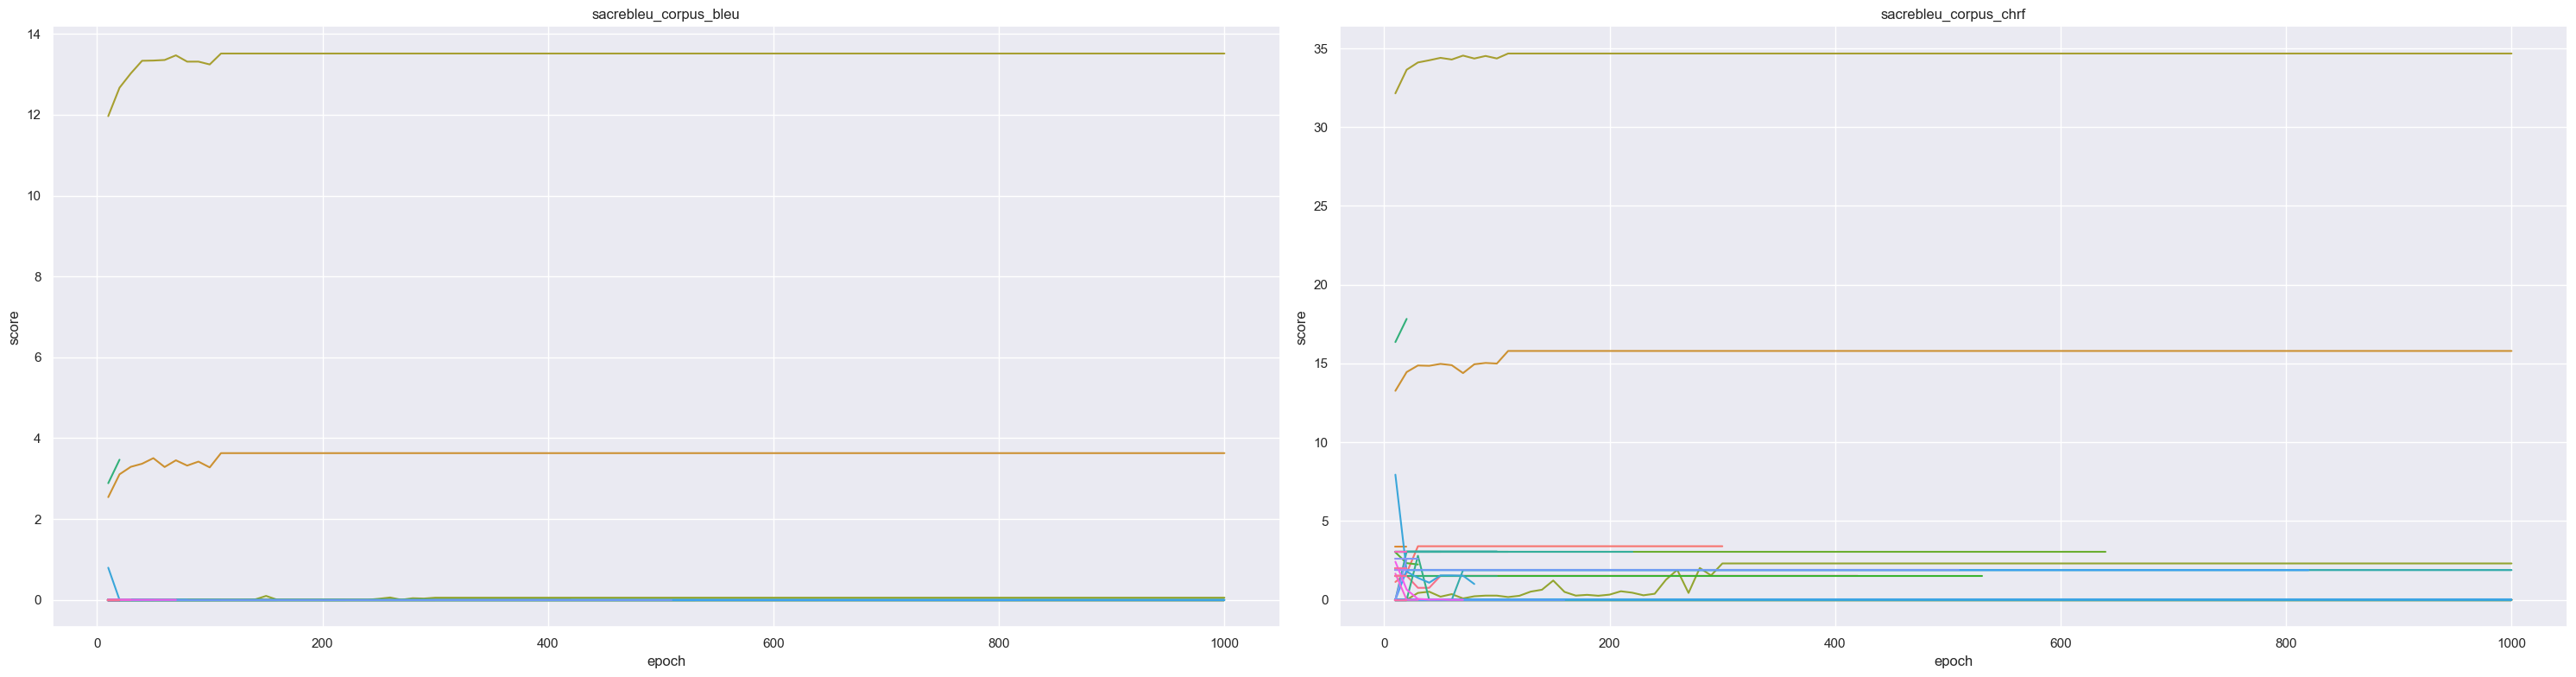

In [161]:
plots.plot_metric_by_epoch_foreach_model(not_kept_gn_es_transformer_models_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(30,8), legend=False);

f:\my_year2023\PLN\code\MARIAN\scripts\migrations\..\..\notebooks\utils\plots.py:42: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


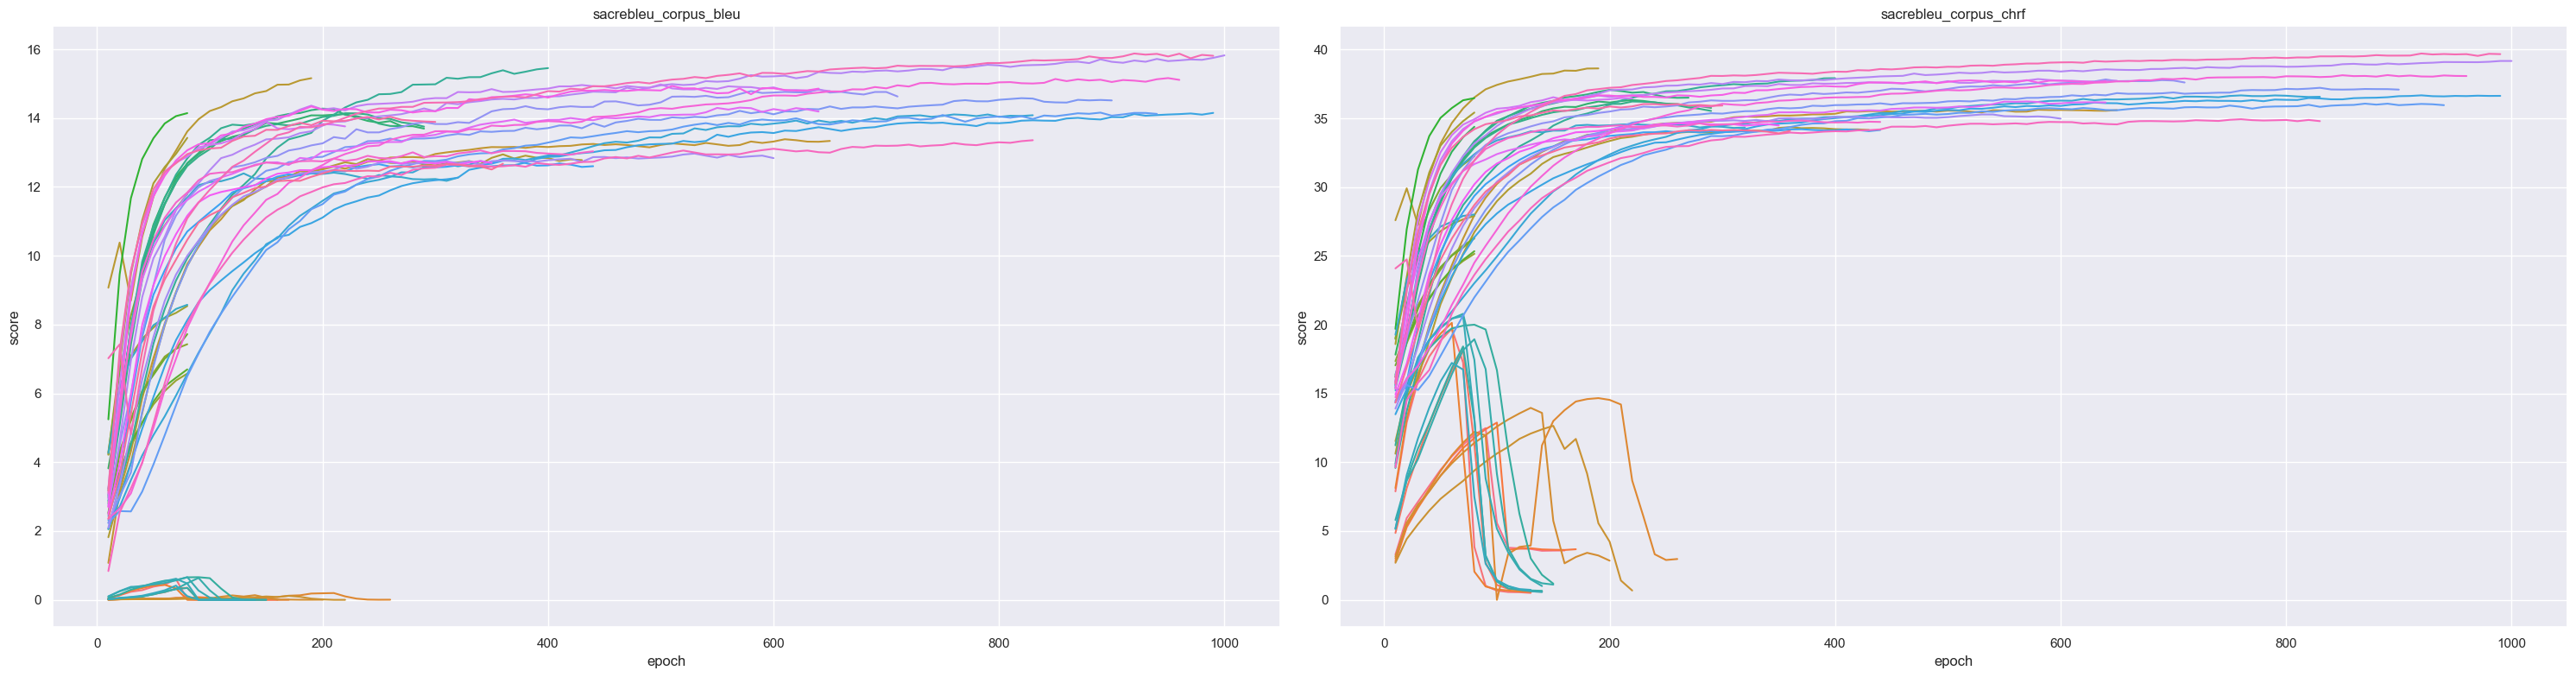

In [162]:
plots.plot_metric_by_epoch_foreach_model(kept_gn_es_transformer_models_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(30,8), legend=False);

f:\my_year2023\PLN\code\MARIAN\scripts\migrations\..\..\notebooks\utils\plots.py:42: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


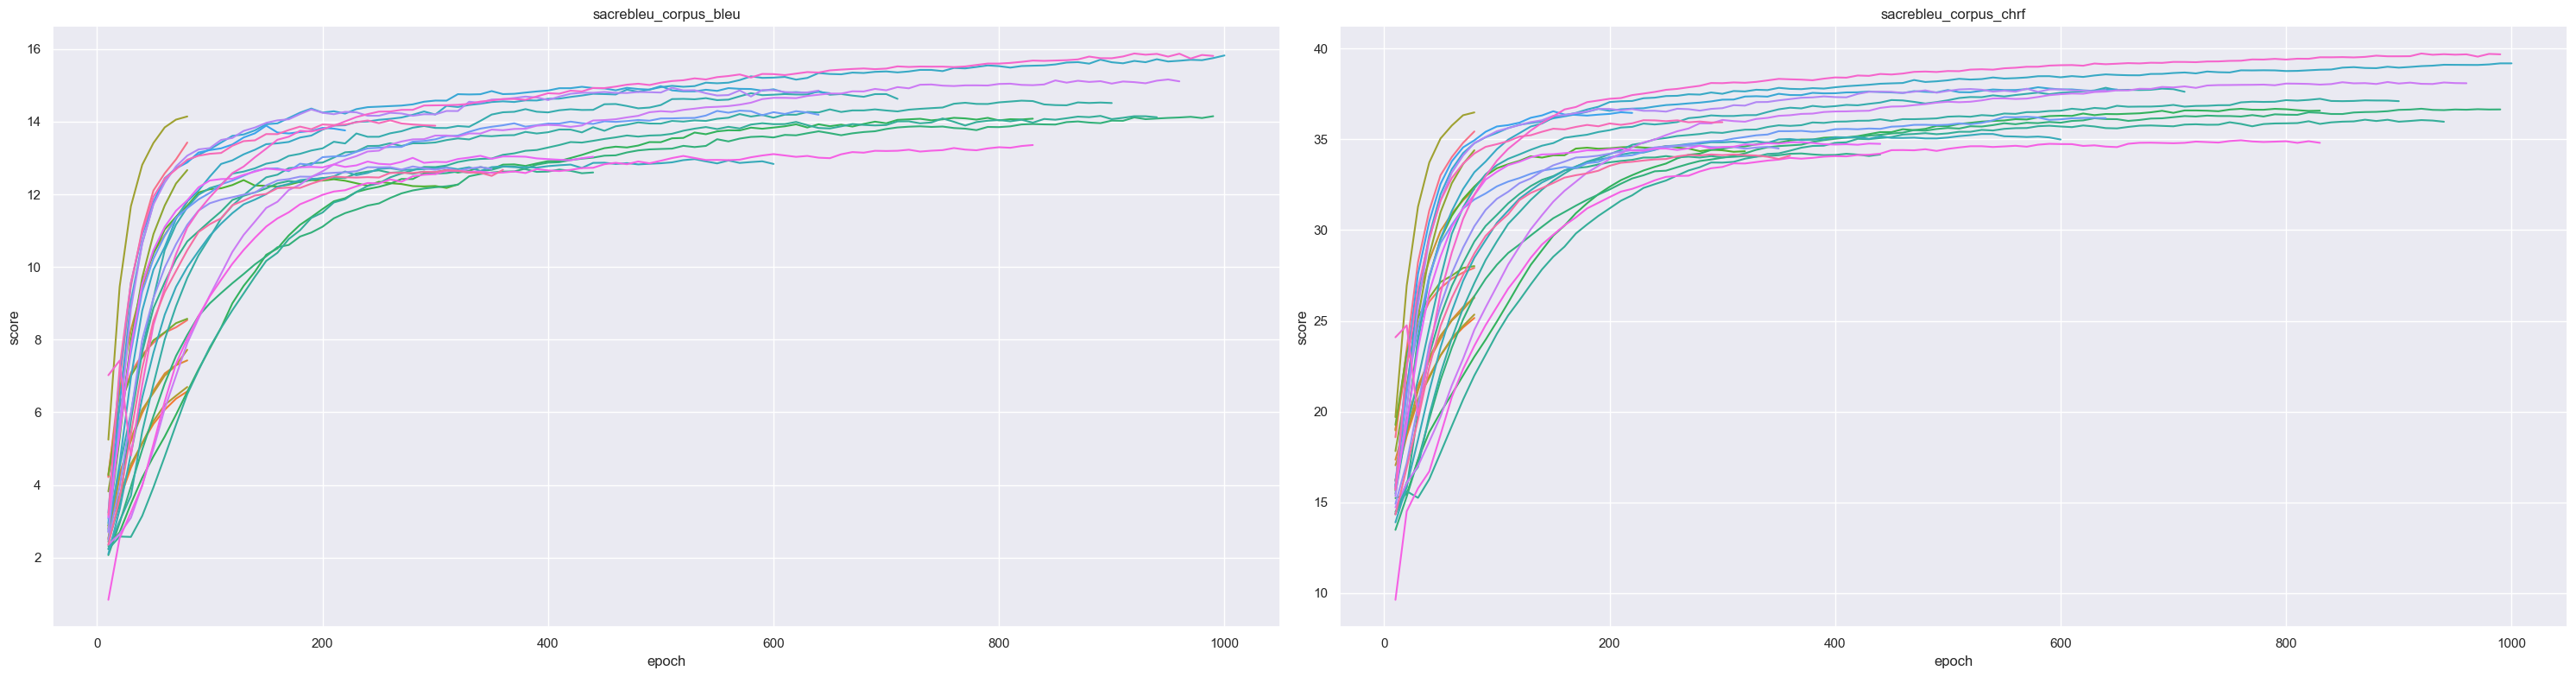

In [163]:
kept_gn_es_transformer_models_df = kept_gn_es_transformer_models_df[kept_gn_es_transformer_models_df['model_name'].str.contains('learn-rate')]
plots.plot_metric_by_epoch_foreach_model(kept_gn_es_transformer_models_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(30,8), legend=False);

f:\my_year2023\PLN\code\MARIAN\scripts\migrations\..\..\notebooks\utils\plots.py:42: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


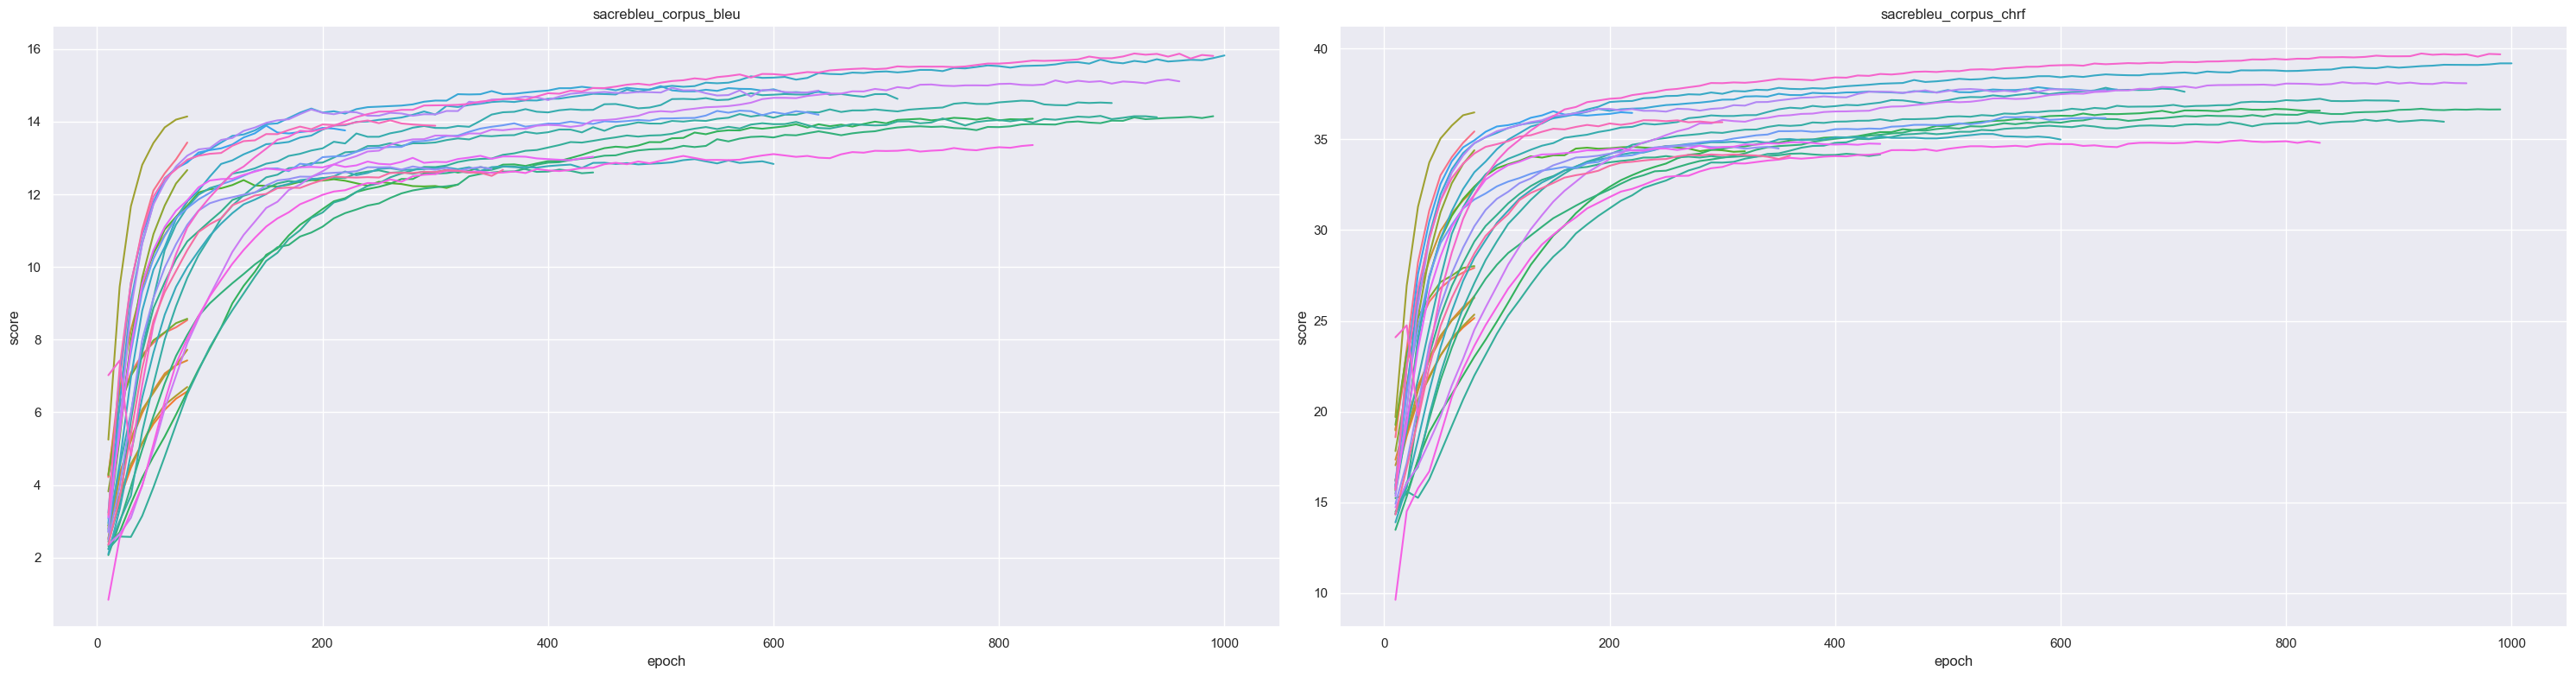

In [164]:
spm_kept_gn_es_transformer_models_df = kept_gn_es_transformer_models_df[kept_gn_es_transformer_models_df['parameters'].str.contains('.spm')]
plots.plot_metric_by_epoch_foreach_model(spm_kept_gn_es_transformer_models_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(30,8), legend=False);

f:\my_year2023\PLN\code\MARIAN\scripts\migrations\..\..\notebooks\utils\plots.py:42: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


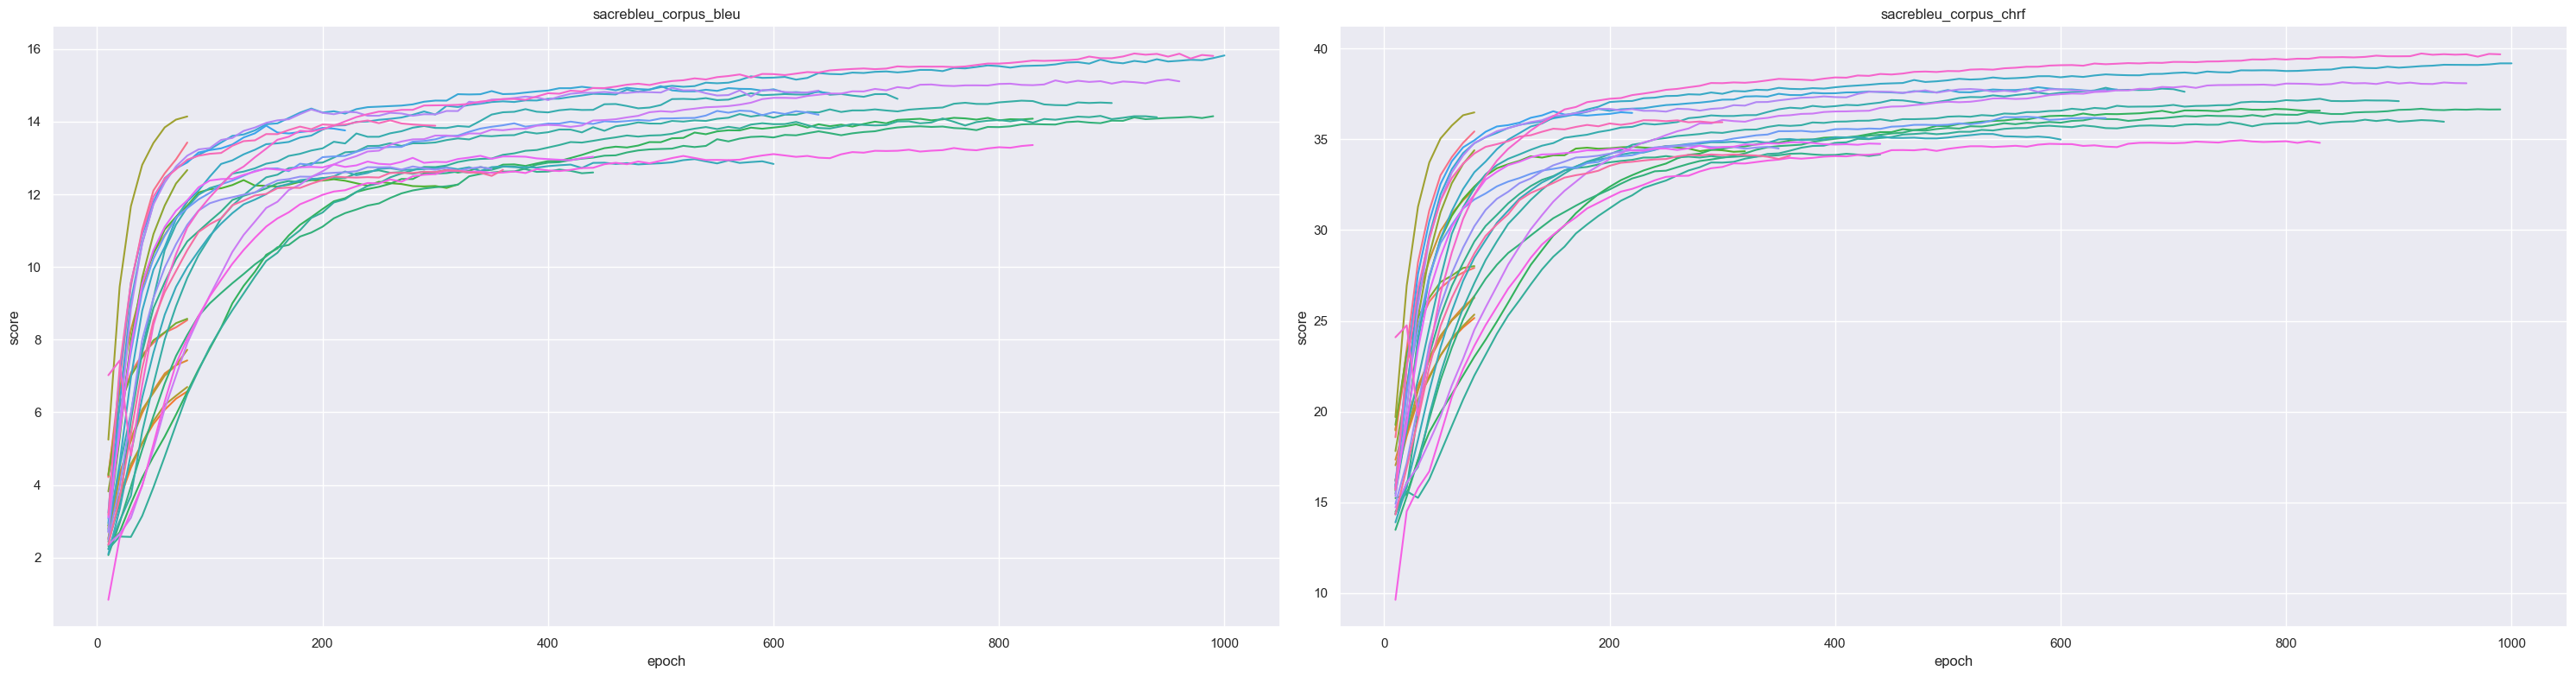

In [165]:
fp16_kept_gn_es_transformer_models_df = spm_kept_gn_es_transformer_models_df[spm_kept_gn_es_transformer_models_df['parameters'].str.contains('fp16')]
plots.plot_metric_by_epoch_foreach_model(fp16_kept_gn_es_transformer_models_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(30,8), legend=False);

f:\my_year2023\PLN\code\MARIAN\scripts\migrations\..\..\notebooks\utils\plots.py:42: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


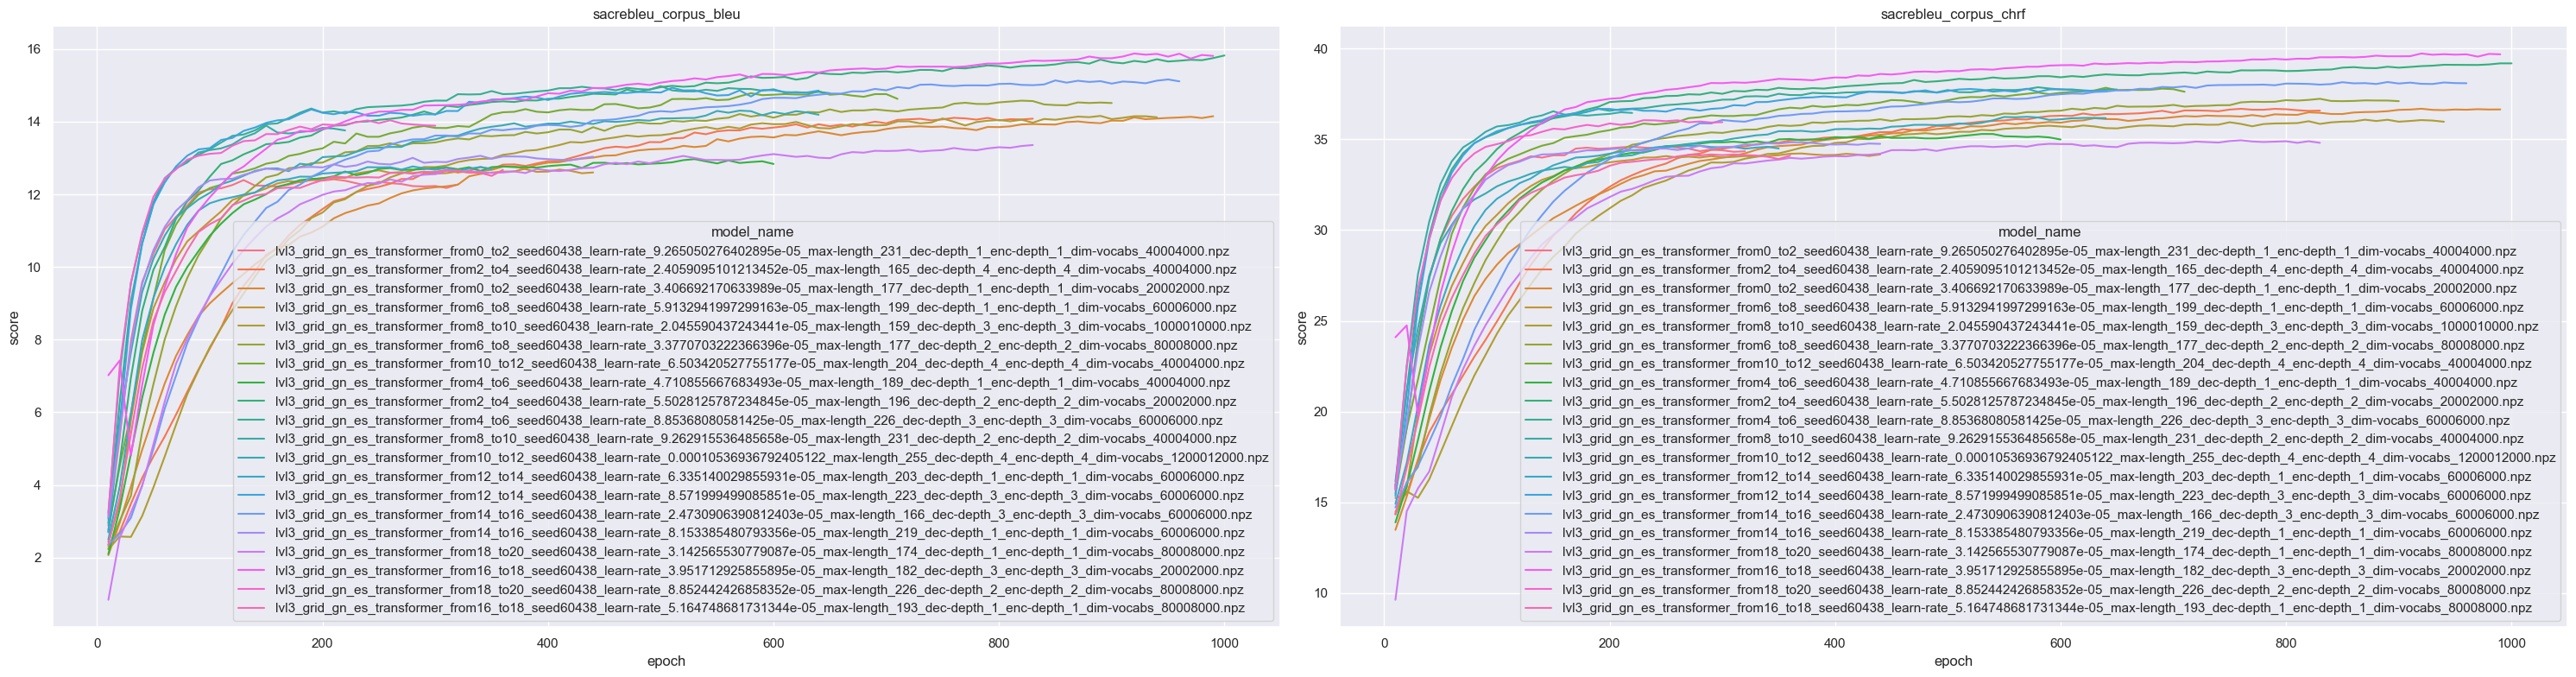

In [166]:
lr_kept_gn_es_transformer_models_df = fp16_kept_gn_es_transformer_models_df[~fp16_kept_gn_es_transformer_models_df['parameters'].str.contains('learn-rate_2.5e-05|learn-rate_5e-05|learn-rate_7.5e-05')]
plots.plot_metric_by_epoch_foreach_model(lr_kept_gn_es_transformer_models_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(30,8), legend=True);

f:\my_year2023\PLN\code\MARIAN\scripts\migrations\..\..\notebooks\utils\plots.py:42: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


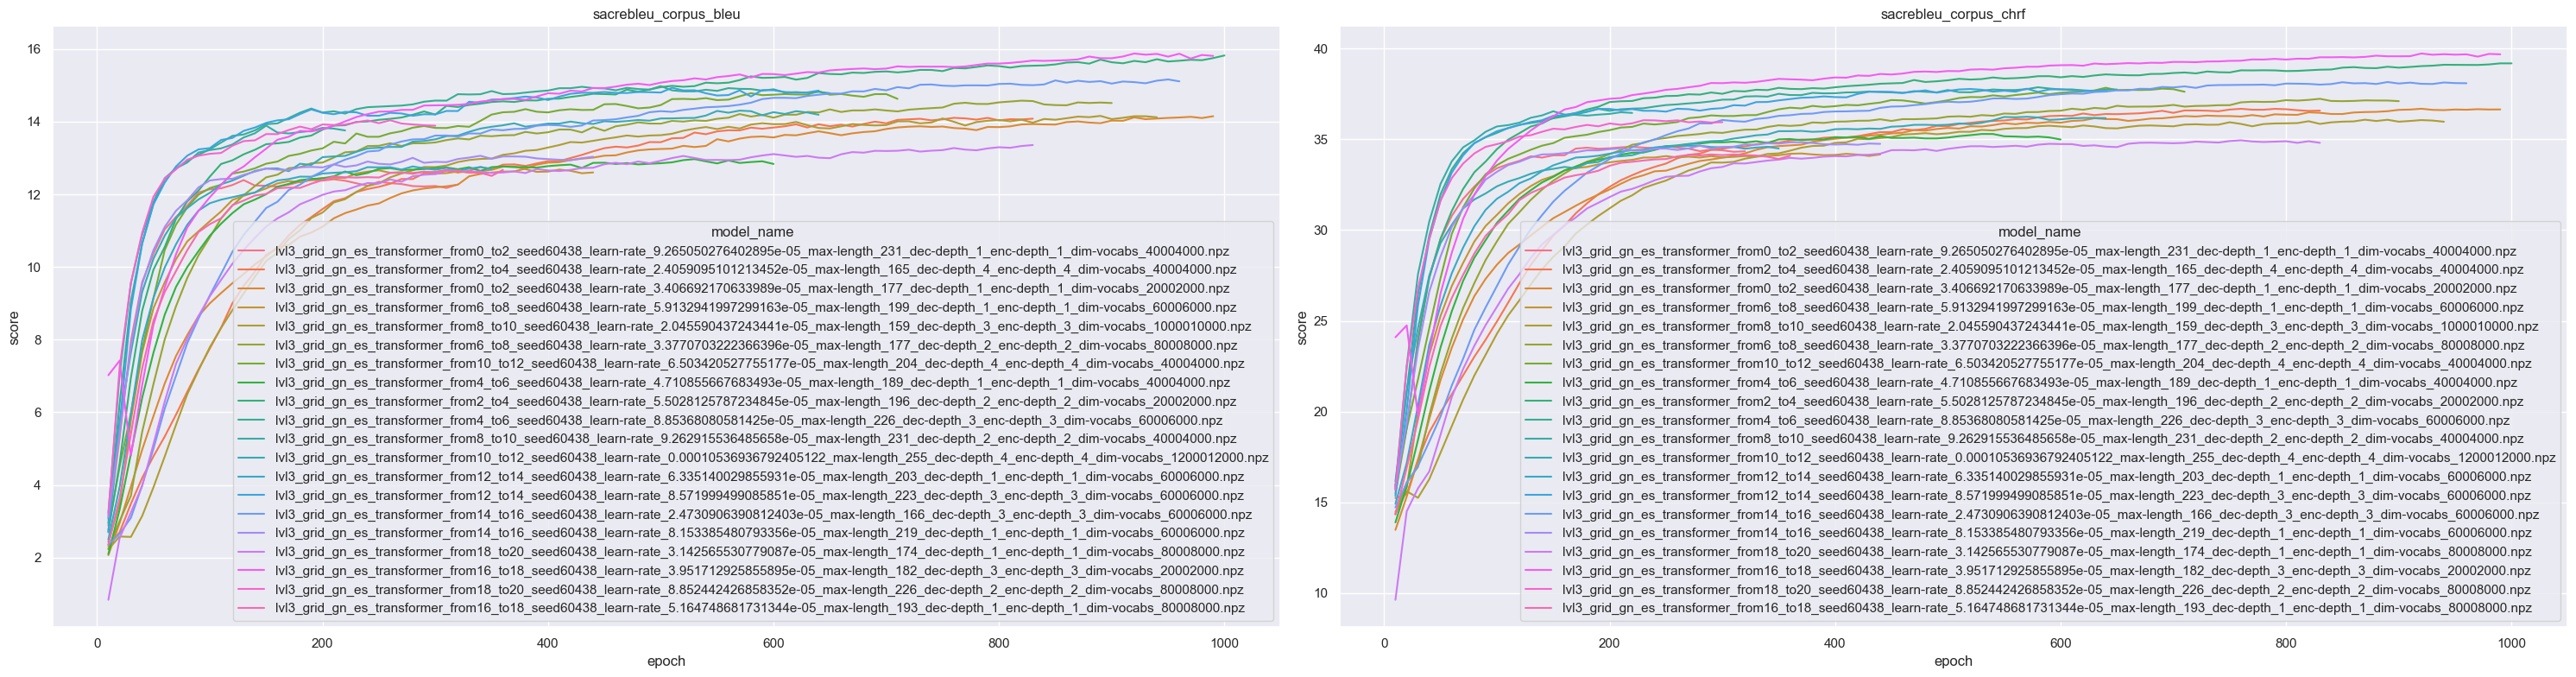

In [167]:
correct_source_kept_gn_es_transformer_models_df = lr_kept_gn_es_transformer_models_df[~lr_kept_gn_es_transformer_models_df['model_name'].str.contains('es_gn')]
plots.plot_metric_by_epoch_foreach_model(correct_source_kept_gn_es_transformer_models_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(30,8), legend=True);

In [168]:
len(lr_kept_gn_es_transformer_models_df['model_name'].unique())

20

In [169]:
lr_kept_gn_es_transformer_models_df['model_name'].sort_values().unique().tolist()

['lvl3_grid_gn_es_transformer_from0_to2_seed60438_learn-rate_3.406692170633989e-05_max-length_177_dec-depth_1_enc-depth_1_dim-vocabs_20002000.npz',
 'lvl3_grid_gn_es_transformer_from0_to2_seed60438_learn-rate_9.265050276402895e-05_max-length_231_dec-depth_1_enc-depth_1_dim-vocabs_40004000.npz',
 'lvl3_grid_gn_es_transformer_from10_to12_seed60438_learn-rate_0.00010536936792405122_max-length_255_dec-depth_4_enc-depth_4_dim-vocabs_1200012000.npz',
 'lvl3_grid_gn_es_transformer_from10_to12_seed60438_learn-rate_6.503420527755177e-05_max-length_204_dec-depth_4_enc-depth_4_dim-vocabs_40004000.npz',
 'lvl3_grid_gn_es_transformer_from12_to14_seed60438_learn-rate_6.335140029855931e-05_max-length_203_dec-depth_1_enc-depth_1_dim-vocabs_60006000.npz',
 'lvl3_grid_gn_es_transformer_from12_to14_seed60438_learn-rate_8.571999499085851e-05_max-length_223_dec-depth_3_enc-depth_3_dim-vocabs_60006000.npz',
 'lvl3_grid_gn_es_transformer_from14_to16_seed60438_learn-rate_2.4730906390812403e-05_max-length_166_

In [171]:
lr_kept_gn_es_transformer_models_df.to_csv(LVL3_TRANSFORMER_GN_ES_CLEANED, index=False)